In [2]:
# define relevants paths and load functions and libraries

%run Z:\\home\\shared\\Gaia\\Coliseum\\Delays\\paper_code\\Analysis\\helper_functions\\functions_analysis.py
    
data_path = 'paper_code\\Datasets\\' # your data path
saving_path = 'paper_code\\Figures_output\\' # your saving figures path

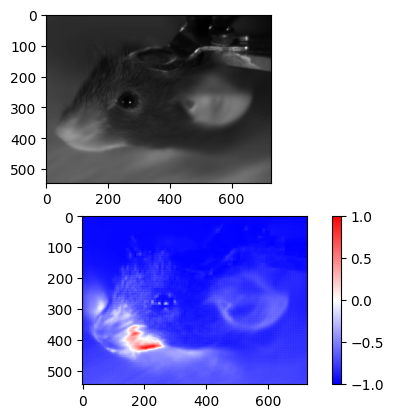

In [24]:
# Plot mean image and first PC of motion energy - Fig 1A

fig, ax = plt.subplots(2,1) 

# load example average frame
load_dir = ''.join([data_path,'movement_control_datasets\\avg_image_example.npy'])
avgframe = np.load(load_dir)

im = ax[0].imshow(avgframe,cmap = 'gray',aspect='equal')

# First PC motion average
which_video = os.path.join(data_path,'movement_control_datasets\\raw_data\\GB32_S2')
output_file = os.path.join(os.path.join(which_video, 'U_video_reduced.npy'))
U = np.load(output_file)
Ly, Lx = 544,728
ncomps = U.shape[1]
motMask = np.reshape(U, (Ly, Lx, ncomps))
# Normalize it
norm_Mask = np.array([(motMask[:, :, j] / motMask[:, :, j].std()) for j in range(ncomps)])
data = norm_Mask[0, :, :]
data_min = np.min(data)
data_max = np.max(data)
# Normalize to [-1, 1]
normalized_data = 2 * (data - data_min) / (data_max - data_min) - 1

im1 = ax[1].imshow(normalized_data, cmap='bwr', vmin=-1, vmax=1,aspect='equal')
fig.colorbar(im1, ax=ax[1])

# define a saving directory and save it 
dir = ''.join([saving_path,'Supplementary_Figure1A.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)


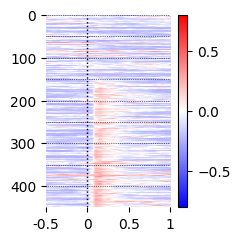

In [21]:
# Plot psth of motion energy - Fig 1B

load_dir = ''.join([data_path,'movement_control_datasets\\psth_example.npy'])
features_norm = np.load(load_dir)

bin_size = 5 
num_rows, num_cols = features_norm.shape

# Ensure the number of columns is divisible by bin_size
num_bins = num_cols // bin_size
features_binned = features_norm[:, :num_bins * bin_size].reshape(num_rows, num_bins, bin_size).mean(axis=2)

# Plot the downsampled version
fig, ax = plt.subplots(1, 1, figsize=(2,2.5))
val_min = -0.8
val_max = 0.8
im = ax.imshow(features_binned[:, :210 // bin_size], cmap='bwr', vmin=val_min, vmax=val_max, aspect='auto')
# Scale them down by the bin_size
orig_xticks = np.array([0, 50, 100, 150, 200])
new_xticks = orig_xticks // bin_size
ax.set_xticks(new_xticks)
ax.set_xticklabels([-0.5,0,0.5,1,1.5])
ax.set_xlim([0,new_xticks[-2]])
ax.axvline(new_xticks[1], linestyle='dotted', color='black', linewidth=1)
# Add horizontal lines every 50 values
for y in range(0, features_binned.shape[0], 50):  # Adjust `features_binned.shape[0]` as needed
    ax.axhline(y, linestyle='dotted', color='black', linewidth=0.5)
fig.colorbar(im, ax=ax)
sns.despine(top=True, right=True, left=True, bottom=True)

# define a saving directory and save it 
dir = ''.join([saving_path,'Supplementary_Figure1B.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)


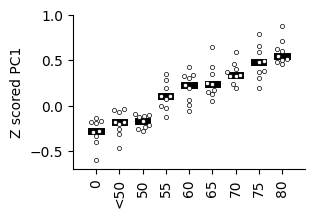

In [15]:
# Plot z-scored motion energy weights for the first PC for different sound intensities - Fig 1C

load_dir = ''.join([data_path,'movement_control_datasets\\z_scored_PC1_sound_intensity.npy'])
avg_pc1 = np.load(load_dir)

fig, ax = plt.subplots(1, 1, figsize=(3,2))
chance_accuracy = (1/11)*100
meanLineWidth = 0.2
num_locations = avg_pc1.shape[1]
for loc in range(num_locations):
        
    curr_scores = avg_pc1[:, loc]
    med = np.median(curr_scores)

    ax.plot([-meanLineWidth + loc, meanLineWidth + loc], [med, med], linewidth=5, c='k', zorder=1)
    sns.swarmplot(x=loc, y=curr_scores, ax=ax, size=3, facecolors = 'white',edgecolor='k', linewidth=0.5, zorder=2)

sns.despine(top=True, right=True, left=False, bottom=False)
ax.set_ylabel('Z scored PC1',fontsize = 10)
x_positions = np.arange(num_locations)

x_labels = [0,'<50',50,55,60,65,70,75,80]
ax.set_xticks(x_positions, x_labels ,rotation=90,fontsize = 10)
ax.set_xlim([-1,9])
ax.set_ylim([-0.7,1])

# define a saving directory and save it 
dir = ''.join([saving_path,'Supplementary_Figure1C.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)


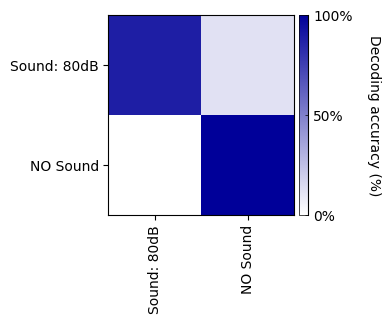

In [8]:
# Plot example confusion matrix for 80dB sound and no sound classification - Fig 1D
# load the outputs from this code run_classifier_movement_control_SoundNoSound.py

animal = 0
file =''.join([data_path,f'movement_control_datasets\\decoder_analysis\\PRED_SoundNoSound_animal_{animal}_SVM.npy'])     
predicted=np.load(file)
file =''.join([data_path,f'movement_control_datasets\\decoder_analysis\\TEST_SoundNoSound_animal_{animal}_SVM.npy'])     
y_test=np.load(file)

cm_all = confusion_matrix(np.array(y_test).reshape(-1),np.array(predicted).reshape(-1),normalize='true')*100
fig, ax2 = plt.subplots(1,1, figsize=(2,2)) 
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.subplots_adjust(hspace=0.5)

val_max = 100
val_min = 0
cmap = colors.LinearSegmentedColormap.from_list('mycmap', [(1, 1, 1), '#000099']) 
cm = cm_all
im = ax2.imshow(cm,aspect="auto", cmap = cmap,vmin=val_min, vmax=val_max)

x_positions = np.arange(cm.shape[0])
x_labels = ['Sound: 80dB','NO Sound']
ax2.set_xticks(x_positions, x_labels ,rotation=90,fontsize = 10)  
ax2.set_yticks(x_positions, x_labels ,rotation=0,fontsize = 10)

divider = make_axes_locatable(ax2)
norm = LogNorm(vmin=val_min, vmax=val_max)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im,cax=cax ,ticks=[0, val_max/2, val_max], norm=norm)
cbar.set_label('Decoding accuracy (%)',rotation=-90,labelpad=20,fontsize=10)
cbar.ax.set_yticklabels(['0%', '{:.0f}%'.format(val_max/2),'{:.0f}%'.format(val_max)])
cbar.ax.yaxis.set_ticks_position('right')
cbar.ax.yaxis.set_label_position('right')
cbar.ax.spines['right'].set_visible(True)
cbar.ax.tick_params(width=0.5, length=2, direction='in', which='both')
cbar.outline.set_linewidth(0.5)

# define a saving directory and save it 
dir = ''.join([saving_path,'Supplementary_Figure1D_left.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)


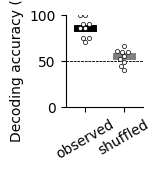

In [9]:
# Plot decoding accuracy for 80dB sound and no sound classification - Fig 1D

load_dir = ''.join([data_path,'movement_control_datasets\\decoder_accuracy_80dBSoundNoSound.npy'])
all_scores = np.load(load_dir)

# let's plot it
fig, ax = plt.subplots(1, 1, figsize=(1,1.2))
chance_accuracy = (1/2)*100
meanLineWidth = 0.2

num_locations = all_scores.shape[1]
for loc in range(num_locations):
    
    if loc == 0:
        this_color = 'k'
    else:
        this_color = 'grey'
        
    curr_scores = all_scores[:, loc]
    med = np.median(curr_scores)

    ax.axhline(y=chance_accuracy, color='k', linestyle='--',linewidth=0.5)
    ax.plot([-meanLineWidth + loc, meanLineWidth + loc], [med, med], linewidth=5, c=this_color, zorder=1)
    sns.swarmplot(x=loc, y=curr_scores, ax=ax, size=3, facecolors = 'white',edgecolor='k', linewidth=0.5, zorder=2)

sns.despine(top=True, right=True, left=False, bottom=False)
ax.set_ylabel('Decoding accuracy (%)',fontsize = 10)
ax.set_xticks([0,1])
ax.set_xticklabels(['observed','shuffled'],rotation=30,fontsize = 10)
ax.set_ylim([0,100])

# define a saving directory and save it 
dir = ''.join([saving_path,'Supplementary_Figure1D_right.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)

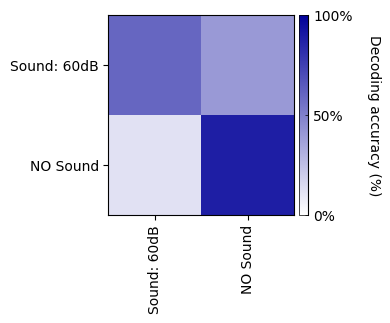

In [10]:
# Plot example confusion matrix for 60dB sound and no sound classification - Fig 1E
# load the outputs from this code run_classifier_movement_control_SoundNoSound.py

animal = 0
file =''.join([data_path,f'movement_control_datasets\\decoder_analysis\\PRED_SoundNoSound60dB_animal_{animal}_SVM.npy'])     
predicted=np.load(file)
file =''.join([data_path,f'movement_control_datasets\\decoder_analysis\\TEST_SoundNoSound60dB_animal_{animal}_SVM.npy'])     
y_test=np.load(file)

cm_all = confusion_matrix(np.array(y_test).reshape(-1),np.array(predicted).reshape(-1),normalize='true')*100
fig, ax2 = plt.subplots(1,1, figsize=(2,2)) 
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.subplots_adjust(hspace=0.5)

val_max = 100
val_min = 0
cmap = colors.LinearSegmentedColormap.from_list('mycmap', [(1, 1, 1), '#000099']) 
cm = cm_all
im = ax2.imshow(cm,aspect="auto", cmap = cmap,vmin=val_min, vmax=val_max)

x_positions = np.arange(cm.shape[0])
x_labels = ['Sound: 60dB','NO Sound']
ax2.set_xticks(x_positions, x_labels ,rotation=90,fontsize = 10)  
ax2.set_yticks(x_positions, x_labels ,rotation=0,fontsize = 10)

divider = make_axes_locatable(ax2)
norm = LogNorm(vmin=val_min, vmax=val_max)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im,cax=cax ,ticks=[0, val_max/2, val_max], norm=norm)
cbar.set_label('Decoding accuracy (%)',rotation=-90,labelpad=20,fontsize=10)
cbar.ax.set_yticklabels(['0%', '{:.0f}%'.format(val_max/2),'{:.0f}%'.format(val_max)])
cbar.ax.yaxis.set_ticks_position('right')
cbar.ax.yaxis.set_label_position('right')
cbar.ax.spines['right'].set_visible(True)
cbar.ax.tick_params(width=0.5, length=2, direction='in', which='both')
cbar.outline.set_linewidth(0.5)

# define a saving directory and save it 
dir = ''.join([saving_path,'Supplementary_Figure1E_left.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)

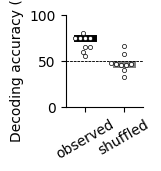

In [11]:
# Plot decoding accuracy for 80dB sound and no sound classification - Fig 1E

load_dir = ''.join([data_path,'movement_control_datasets\\decoder_accuracy_60dBSoundNoSound.npy'])
all_scores = np.load(load_dir)

# let's plot it
fig, ax = plt.subplots(1, 1, figsize=(1,1.2))
chance_accuracy = (1/2)*100
meanLineWidth = 0.2

num_locations = all_scores.shape[1]
for loc in range(num_locations):
    
    if loc == 0:
        this_color = 'k'
    else:
        this_color = 'grey'
        
    curr_scores = all_scores[:, loc]
    med = np.median(curr_scores)

    ax.axhline(y=chance_accuracy, color='k', linestyle='--',linewidth=0.5)
    ax.plot([-meanLineWidth + loc, meanLineWidth + loc], [med, med], linewidth=5, c=this_color, zorder=1)
    sns.swarmplot(x=loc, y=curr_scores, ax=ax, size=3, facecolors = 'white',edgecolor='k', linewidth=0.5, zorder=2)

sns.despine(top=True, right=True, left=False, bottom=False)
ax.set_ylabel('Decoding accuracy (%)',fontsize = 10)
ax.set_xticks([0,1])
ax.set_xticklabels(['observed','shuffled'],rotation=30,fontsize = 10)
ax.set_ylim([0,100])

# define a saving directory and save it 
dir = ''.join([saving_path,'Supplementary_Figure1E_right.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)

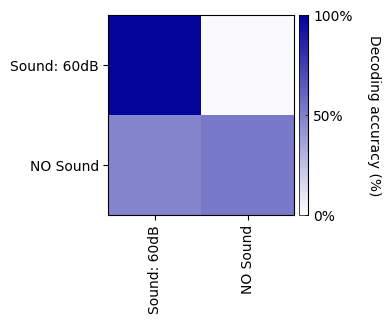

In [13]:
# Plot example confusion matrix for vis stimulus classification - Fig 1F
# load the outputs from this code run_classifier_movement_control_VisNoVis

animal = 0
file =''.join([data_path,f'movement_control_datasets\\decoder_analysis\\PRED_StimNoStim_Vis_animal_{animal}_SVM.npy'])     
predicted=np.load(file)
file =''.join([data_path,f'movement_control_datasets\\decoder_analysis\\TEST_StimNoStim_Vis_animal_{animal}_SVM.npy'])     
y_test=np.load(file)

cm_all = confusion_matrix(np.array(y_test).reshape(-1),np.array(predicted).reshape(-1),normalize='true')*100
fig, ax2 = plt.subplots(1,1, figsize=(2,2)) 
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.subplots_adjust(hspace=0.5)

val_max = 100
val_min = 0
cmap = colors.LinearSegmentedColormap.from_list('mycmap', [(1, 1, 1), '#000099']) 
cm = cm_all
im = ax2.imshow(cm,aspect="auto", cmap = cmap,vmin=val_min, vmax=val_max)

x_positions = np.arange(cm.shape[0])
x_labels = ['Sound: 60dB','NO Sound']
ax2.set_xticks(x_positions, x_labels ,rotation=90,fontsize = 10)  
ax2.set_yticks(x_positions, x_labels ,rotation=0,fontsize = 10)

divider = make_axes_locatable(ax2)
norm = LogNorm(vmin=val_min, vmax=val_max)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im,cax=cax ,ticks=[0, val_max/2, val_max], norm=norm)
cbar.set_label('Decoding accuracy (%)',rotation=-90,labelpad=20,fontsize=10)
cbar.ax.set_yticklabels(['0%', '{:.0f}%'.format(val_max/2),'{:.0f}%'.format(val_max)])
cbar.ax.yaxis.set_ticks_position('right')
cbar.ax.yaxis.set_label_position('right')
cbar.ax.spines['right'].set_visible(True)
cbar.ax.tick_params(width=0.5, length=2, direction='in', which='both')
cbar.outline.set_linewidth(0.5)

# define a saving directory and save it 
dir = ''.join([saving_path,'Supplementary_Figure1F_left.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)

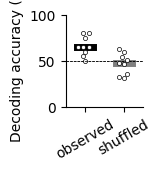

In [12]:
# Plot decoding accuracy for vis stimulus classification - Fig 1F

load_dir = ''.join([data_path,'movement_control_datasets\\decoder_accuracy_StimNoStim_Vis.npy'])
all_scores = np.load(load_dir)

# let's plot it
fig, ax = plt.subplots(1, 1, figsize=(1,1.2))
chance_accuracy = (1/2)*100
meanLineWidth = 0.2

num_locations = all_scores.shape[1]
for loc in range(num_locations):
    
    if loc == 0:
        this_color = 'k'
    else:
        this_color = 'grey'
        
    curr_scores = all_scores[:, loc]
    med = np.median(curr_scores)

    ax.axhline(y=chance_accuracy, color='k', linestyle='--',linewidth=0.5)
    ax.plot([-meanLineWidth + loc, meanLineWidth + loc], [med, med], linewidth=5, c=this_color, zorder=1)
    sns.swarmplot(x=loc, y=curr_scores, ax=ax, size=3, facecolors = 'white',edgecolor='k', linewidth=0.5, zorder=2)

sns.despine(top=True, right=True, left=False, bottom=False)
ax.set_ylabel('Decoding accuracy (%)',fontsize = 10)
ax.set_xticks([0,1])
ax.set_xticklabels(['observed','shuffled'],rotation=30,fontsize = 10)
ax.set_ylim([0,100])

# define a saving directory and save it 
dir = ''.join([saving_path,'Supplementary_Figure1F_right.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)


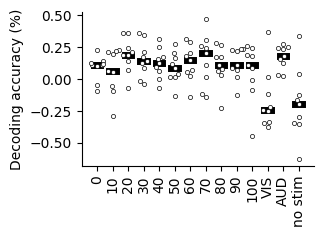

In [17]:
# Plot z-scored motion energy weights for the first PC for different AV delays - Fig 1G

load_dir = ''.join([data_path,'movement_control_datasets\\z_scored_PC1_AVdelays.npy'])
avg_pc1 = np.load(load_dir)

fig, ax = plt.subplots(1, 1, figsize=(3,2))
chance_accuracy = (1/11)*100
meanLineWidth = 0.2
num_locations = avg_pc1.shape[1]
for loc in range(num_locations):
        
    curr_scores = avg_pc1[:, loc]
    med = np.median(curr_scores)

    ax.plot([-meanLineWidth + loc, meanLineWidth + loc], [med, med], linewidth=5, c='k', zorder=1)
    sns.swarmplot(x=loc, y=curr_scores, ax=ax, size=3, facecolors = 'white',edgecolor='k', linewidth=0.5, zorder=2)

sns.despine(top=True, right=True, left=False, bottom=False)
ax.set_ylabel('Decoding accuracy (%)',fontsize = 10)
x_positions = np.arange(num_locations)

x_labels = [0,10,20,30,40,50,60,70,80,90,100,'VIS','AUD','no stim']
ax.set_xticks(x_positions, x_labels ,rotation=90,fontsize = 10)
ax.set_xlim([-1,14])

# define a saving directory and save it 
dir = ''.join([saving_path,'Supplementary_Figure1G.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)
